# Project 2: Ames Housing Data

**Part 2 Preprocessing and Feature Engineering** 

**Table of content**
1. Feature Engineering
2. Create Dummy Variables
3. Save Data for Part 3

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

%matplotlib inline

In [23]:
# import Cleaned Data
train_final = pd.read_csv('./datasets/train_final.csv')

#Set id as index 
train_final.set_index('id', inplace=True)

# Check for nulls
(train_final.isnull().sum())[train_final.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [3]:
train_final.shape

(2044, 81)

**Feature Engineering**

In [4]:
train_final['total_sf'] = (train_final['total_bsmt_sf'] + 
                     train_final['1st_flr_sf'] + 
                     train_final['2nd_flr_sf'] + 
                     train_final['wood_deck_sf'] + 
                     train_final['open_porch_sf'])
train_final.shape

(2044, 82)

In [5]:
#Creating column for age standardise against different years sold
train_final['housing_age'] = train_final['yr_sold'] - train_final['year_built']
train_final['housing_age'].describe()

count    2044.000000
mean       36.004892
std        30.156534
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: housing_age, dtype: float64

In [6]:
# knowing how old after remodeling
train_final['age_after_remod'] = train_final['yr_sold'] - train_final['year_remod/add']
train_final['age_after_remod'].describe()

count    2044.000000
mean       23.614971
std        21.022818
min        -1.000000
25%         4.000000
50%        15.000000
75%        43.000000
max        60.000000
Name: age_after_remod, dtype: float64

In [7]:
#dropping it since , it affect our data
train_final[train_final['age_after_remod'] == -1]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice,total_sf,housing_age,age_after_remod
id,,,,,,,,,,,,,,,,,,,,,
1703,528120010,60,RL,134.0,16659,Pave,None,IR1,Lvl,AllPub,...,None,0,6,2007,New,260116,12.468883,4102.0,0,-1


In [8]:
train_final.drop([1703], inplace=True)

In [9]:
#checking the seasons 
train_final['seasons'] = train_final['mo_sold'].map(lambda x : 4 if x <= 2 else 1
                                        if x < 6 else 2 
                                        if x < 9 else 3 
                                        if x < 12 else 4)
train_final['seasons'].describe()

count    2043.000000
mean        2.108174
std         0.983979
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: seasons, dtype: float64

In [10]:
#Create dummies for categorical variables

train_final = pd.get_dummies(train_final, columns=['ms_subclass','ms_zoning','street','alley', 
                                               'lot_shape', 'land_contour', 'utilities','lot_config',
                                               'land_slope','condition_1','condition_2','bldg_type',
                                               'house_style','roof_style','roof_matl','exterior_1st',
                                               'exterior_2nd','mas_vnr_type','foundation','bsmtfin_type_1',
                                               'bsmtfin_type_2','heating','central_air','electrical',
                                               'functional','garage_type','garage_finish','paved_drive',
                                               'fence', 'misc_feature','sale_type', 'neighborhood',
                                               'year_built', 'year_remod/add', 'garage_yr_blt'], 
                               drop_first=True)
train_final.head()

,pid,lot_frontage,lot_area,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,...,garage_yr_blt_2003.0,garage_yr_blt_2004.0,garage_yr_blt_2005.0,garage_yr_blt_2006.0,garage_yr_blt_2007.0,garage_yr_blt_2008.0,garage_yr_blt_2009.0,garage_yr_blt_2010.0,garage_yr_blt_2207.0,garage_yr_blt_None
id,,,,,,,,,,,,,,,,,,,,,
1,526301100,141.0,31770,6,5,112.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
3,526351010,81.0,14267,6,6,108.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
5,527105010,74.0,13830,5,5,0.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
8,527145080,43.0,5005,8,5,0.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
9,527146030,39.0,5389,8,5,0.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0


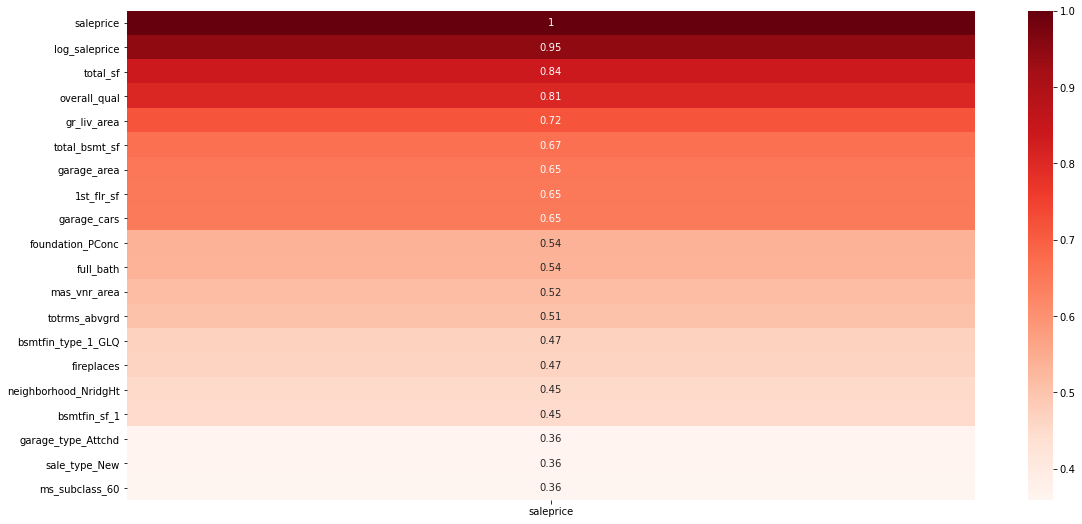

In [17]:
# Variables has highest positive correlation against Sale Price with added Variables and dummies
plt.figure(figsize = (19,9))
train_final_corr = train_final.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_final_corr.head(20)

sns.heatmap(positive_corr, annot = True, cmap='Reds');

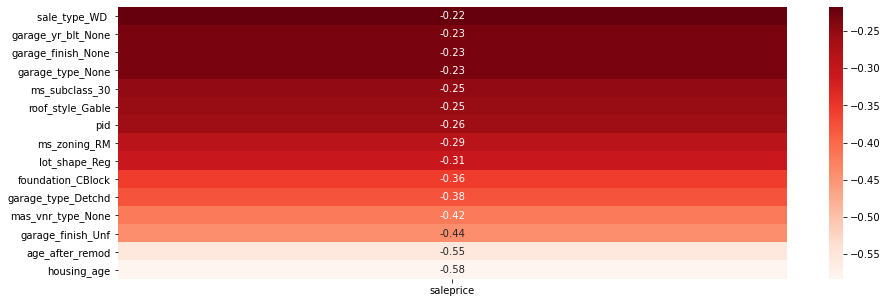

In [18]:
# Variables has highest negative correlation against Sale Price with added Variables and dummies
plt.figure(figsize = (15,5))
train_final_corr = train_final.corr()[['saleprice']].sort_values('saleprice', ascending=False)
positive_corr = train_final_corr.tail(15)

sns.heatmap(positive_corr, annot = True, cmap='Reds');

In [22]:
#export engineered Data
train_final.to_csv('./datasets/train_dummies.csv')